# Polate Wellness Centre: Health & Wellness

## Overview
We shall be using the CRISP DM methodology for this project
* Business Understanding

* Data Understanding

* Exploratory Data Analysis

* Modeling

* Evaluation

* Deployment

## 1. Business Understanding
Polate Wellness Centre has observed a significant increase in patients reporting poor sleep quality, which is negatively impacting their daily productivity and overall well-being. In response, the center is seeking data-driven insights into the factors associated with sleep disorders.

They have tasked me with identifying patterns and similarities among individuals who suffer from sleep disorders, and to develop a predictive model that can achieve at least 90% accuracy in identifying those at risk.

This analysis will support Polate Wellness Centre in:
- Designing effective early screening tools,
- Building an app that will enable the users enter the daily sleep details to give them a summary of their sleep patterns and recommend ways to improve sleep quality.
- And preparing for the integration of predictive diagnostics into routine care once they begin collecting their own patient data.

## 2. Data Understanding
The Sleep Health and Lifestyle Dataset is found on kaggle [here](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)
It consists of 374 rows and 13 columns. See the column names and their respective description:

**Column Name:	Description**

- Age:	Age of the individual

- Gender:	Male/Female

- Occupation:	Job type or profession

- Sleep Duration:	Hours of sleep per night

- Quality of Sleep:	Subjective rating (e.g., 1–10 scale)

- Physical Activity Level:	Exercise frequency

- Stress Level:	Self-reported stress level

- BMI Category:	Underweight, Normal, Overweight, Obese

- Blood Pressure:	Blood pressure readings

- Heart Rate:	Beats per minute

- Daily Steps:	Average number of steps per day

- Sleep Disorder:	Diagnosed sleep disorder: None, Insomnia, Sleep Apnea

- Daily Steps:	Average number of steps per day

- Sleep Disorder:	Diagnosed sleep disorder: None, Insomnia, Sleep Apnea

**Data Limitations**

The data is small in size and we do not know when the data was collected. We are therefore not able to do a time based analysis for prediction.

## 3. Data Preparation

### a. Import Relevant libraries for Data Analysis

In [487]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [488]:
#Inspect the first 5 rows of the dataset
health_wellness_df = pd.read_csv('Health_and_wellness\Health and Sleep relation 2024\Sleep_health_and_lifestyle_dataset.csv')
health_wellness_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [489]:
#inspect the shape of the dataset
health_wellness_df.shape

(374, 13)

In [490]:
#Inspect the column names of the dataset
health_wellness_df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [491]:
#Check the statistical data
health_wellness_df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


**Observations**

* The age of the individuals ranges from 27 to 59 years old.

* The mean sleep duration hours is at 7.1 with the standard deviation of 0.8 hrs. 

* The quality of sleep ranges from 4 to 9.

* The Physical Activity Level ranges from 30 to 90. 

* The stress level ranges from 3 to 8 being the maximum.

* The highest heart rate recorded is 86.

* The minimum daily steps recorded is 3000 and the average steps taken daily is 6816.

In [492]:
#Check the Datatypes of the columns
health_wellness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


**Summary**

* The dataset has 374 rows and 13 columns. The datatypes are 1 float64, 7 int64 and 5 objects. Missing values can be seen on column 'Sleep Disorder' where the non-null values are 155. We shall proceed to confirm the missing values and duplicates

In [493]:
#Confirm the missing values
health_wellness_df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [494]:
health_wellness_df.duplicated().sum()

0

**Summary**

* We have 219 null values in the Sleep Disorder and we shall decide how to deal with this. 

* We also do not have any duplicated values.

In [495]:
#Check value distribution for the null values on the Sleep Disorder column
print(health_wellness_df['Sleep Disorder'].isnull().value_counts())
print('------')
print(health_wellness_df['Sleep Disorder'].value_counts(normalize=True))

Sleep Disorder
True     219
False    155
Name: count, dtype: int64
------
Sleep Disorder
Sleep Apnea    0.503226
Insomnia       0.496774
Name: proportion, dtype: float64


**Observations**

* 115 entries have sleep disorder while 219 do not have sleep disorder. We shall then proceed to have a placeholder in the place of null values. We also observe a class imbalance on the target column.

* For those with sleep disorders about 50.3% have Sleep Apnea and 49.7% have Insomnia.

In [496]:
#Fill the null values with 'No Disorder' as a placeholder
health_wellness_df['Sleep Disorder'] = health_wellness_df['Sleep Disorder'].fillna('No Disorder')
health_wellness_df['Sleep Disorder'].value_counts() #Confirmed the placeholder strings are in place


Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

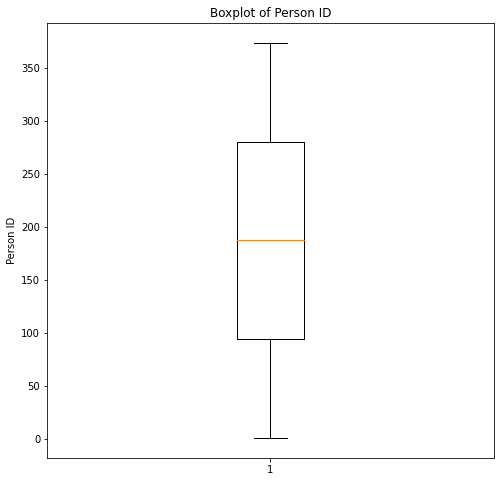

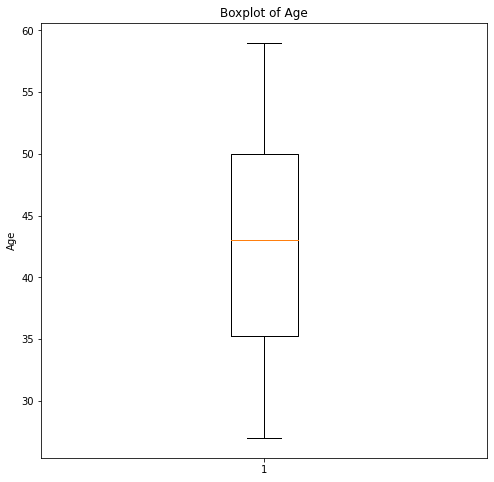

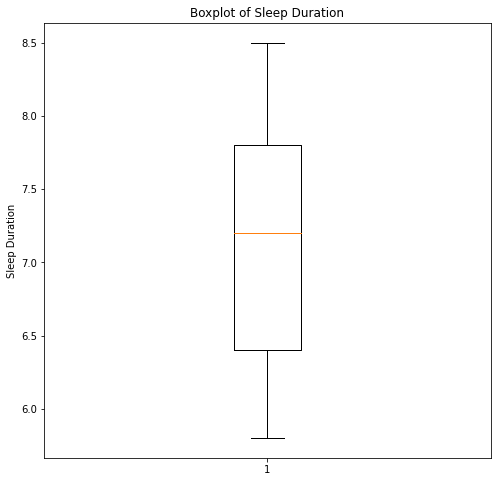

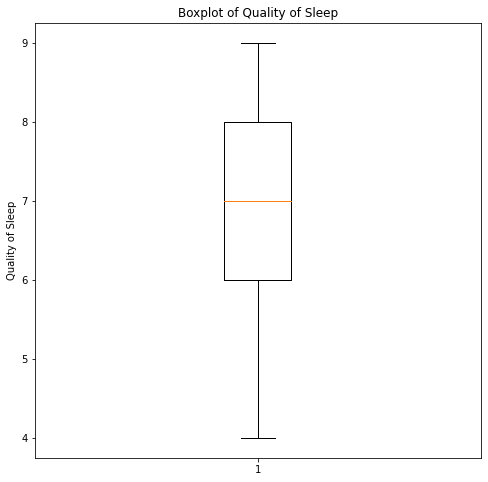

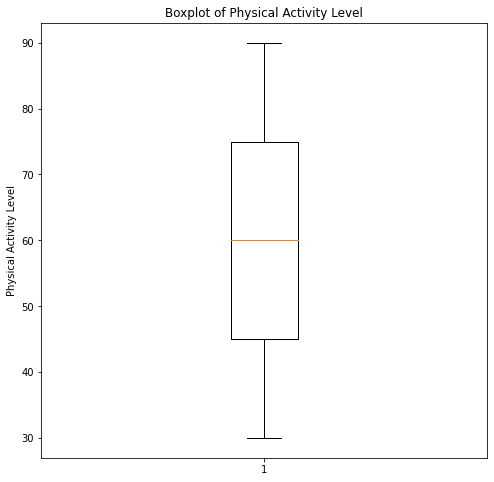

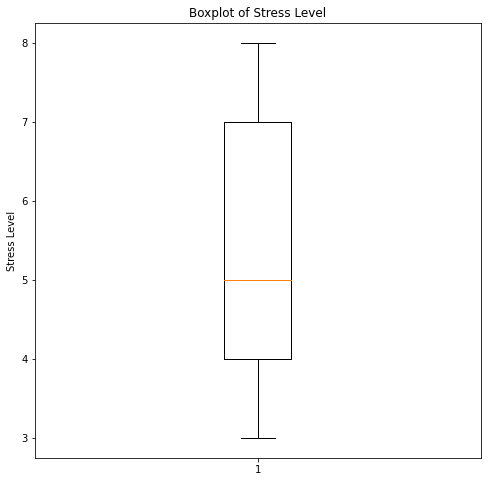

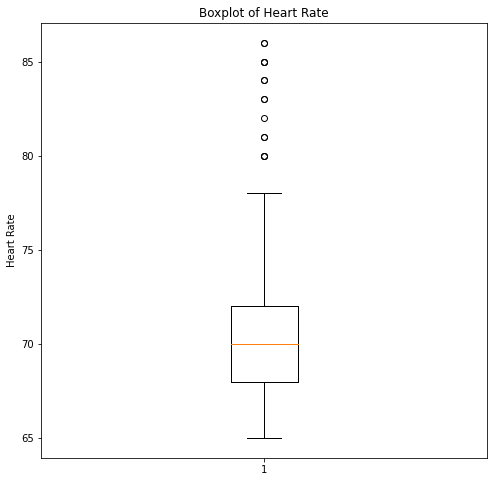

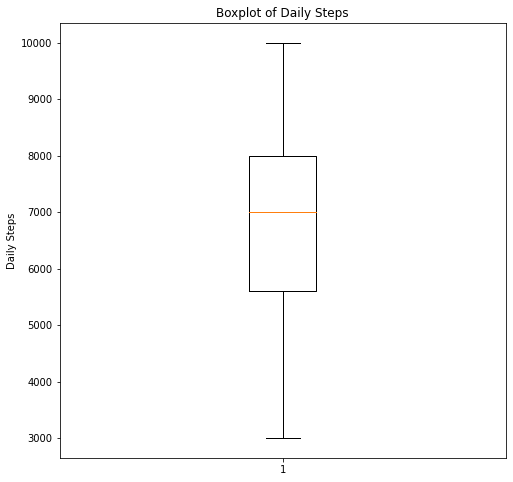

In [497]:
#Confirm whether we have outliers 
numeric_cols = health_wellness_df.select_dtypes('number')
for col in numeric_cols:
    fig, ax = plt.subplots(figsize=(8,8))
    plt.boxplot(health_wellness_df[col])
    plt.ylabel(col)
    plt.title(f'Boxplot of {col}')
    plt.show;

**Observations**

* We observe outliers on the heart rate column. Every other feature is within the distribution.

### 3b. Univariate Analysis
It involves examining a single variable (column) at a time to understand its distribution, central tendency, and spread

Gender
Male      189
Female    185
Name: count, dtype: int64


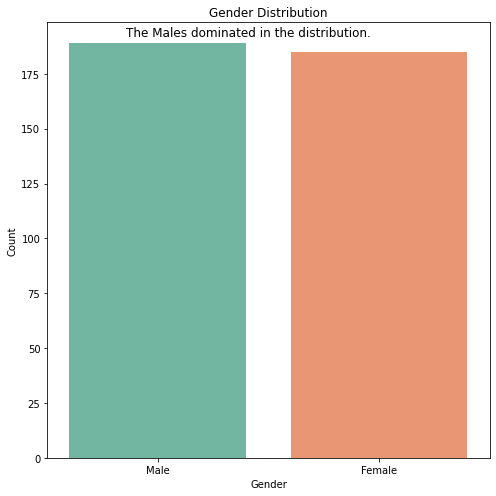

In [498]:
#Lets observe the gender distribution
gender_dist = health_wellness_df['Gender'].value_counts()
print(gender_dist)
#Plot the graph
fig, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x=gender_dist.index, y=gender_dist.values, palette="Set2", ax=ax)
ax.set_title("Gender Distribution")
fig.text(0.5, 0.92, "The Males dominated in the distribution.", ha='center', fontsize=12)
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

Occupation
Nurse                   19.518717
Doctor                  18.983957
Engineer                16.844920
Lawyer                  12.566845
Teacher                 10.695187
Accountant               9.893048
Salesperson              8.556150
Software Engineer        1.069519
Scientist                1.069519
Sales Representative     0.534759
Manager                  0.267380
Name: proportion, dtype: float64


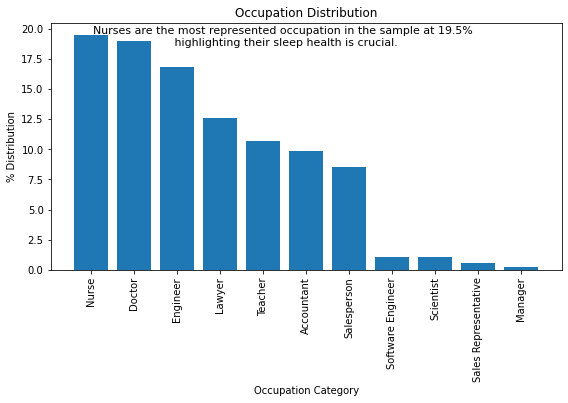

In [499]:
#Lets Observe the occupation distribution
occupation_dist = health_wellness_df['Occupation'].value_counts(normalize=True) *100
print(occupation_dist)

fig, ax = plt.subplots(figsize=(8,6))
plt.bar(occupation_dist.index, occupation_dist.values)
plt.title('Occupation Distribution')
fig.text(0.5, 0.835, 'Nurses are the most represented occupation in the sample at 19.5% \n highlighting their sleep health is crucial.', ha='center', fontsize=11)
plt.xlabel('Occupation Category')
plt.ylabel('% Distribution')
plt.xticks(rotation=90)
plt.tight_layout(rect=[0,0,1, 0.95])
plt.show();

BMI Category
Normal           52.139037
Overweight       39.572193
Normal Weight     5.614973
Obese             2.673797
Name: proportion, dtype: float64


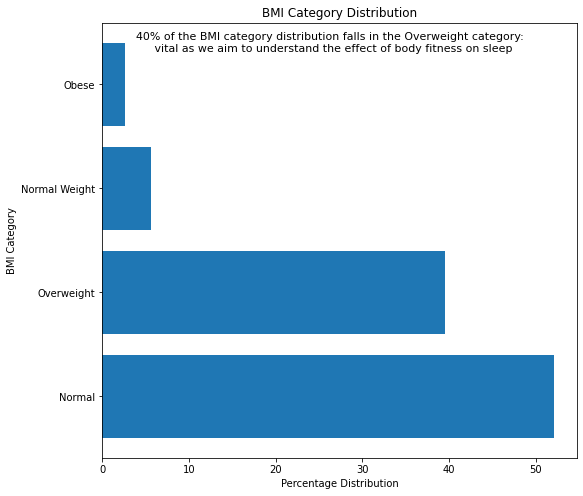

In [500]:
#BMI Category distribution
bmi_cat_dist = health_wellness_df['BMI Category'].value_counts(normalize=True)*100
print(bmi_cat_dist)
fig, ax = plt.subplots(figsize=(8.5,8))
plt.barh(bmi_cat_dist.index, bmi_cat_dist.values)
plt.ylabel('BMI Category')
plt.xlabel('Percentage Distribution')
plt.title('BMI Category Distribution')
fig.text(0.5, 0.83, '40% of the BMI category distribution falls in the Overweight category: \n '
'vital as we aim to understand the effect of body fitness on sleep', 
         ha='center', fontsize=11)
plt.show();

**Observations**

* Most of the individuals that were measured were of normal BMI Category and followed by overweight individuals.

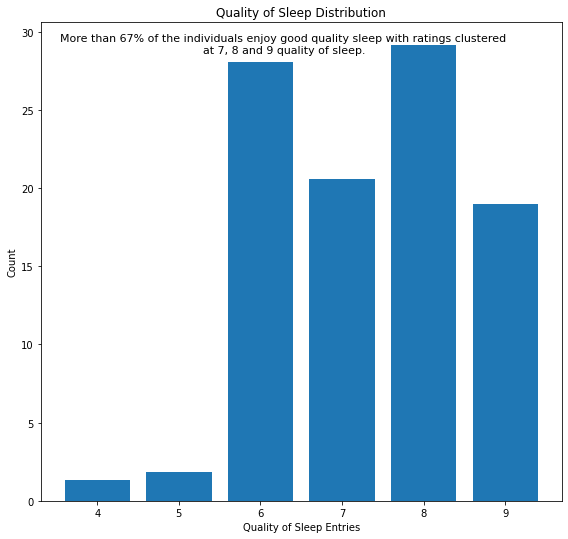

In [501]:
#Lets Observe the Quality of sleep distribution
quality_of_sleep = health_wellness_df['Quality of Sleep'].value_counts(normalize=True)*100
fig, ax = plt.subplots(figsize=(8,8))
plt.bar(quality_of_sleep.index, quality_of_sleep.values)
plt.xlabel('Quality of Sleep Entries')
fig.text(0.5, 0.85, 'More than 67% of the individuals enjoy good quality sleep with ratings clustered \n'
         'at 7, 8 and 9 quality of sleep.', ha='center', fontsize=11)
plt.ylabel('Count')
plt.title('Quality of Sleep Distribution')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show();

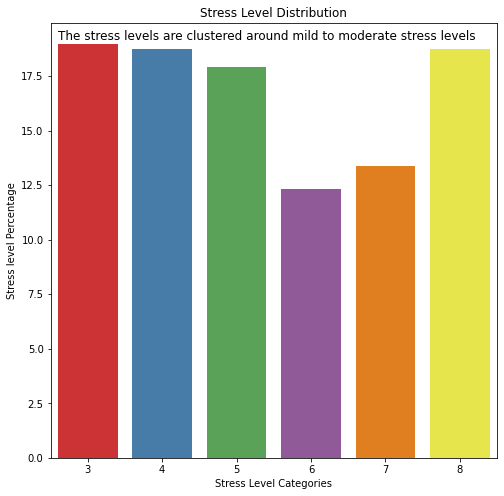

In [502]:
# Lets observe the Sress level distribution
stress_level_dist = health_wellness_df['Stress Level'].value_counts(normalize=True) *100
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x=stress_level_dist.index, y=stress_level_dist.values, ax=ax, palette='Set1')
ax.set_ylabel('Stress level Percentage')
ax.set_xlabel('Stress Level Categories')
ax.set_title('Stress Level Distribution')
fig.text(0.5, 0.85, 'The stress levels are clustered around mild to moderate stress levels', ha='center', fontsize=12)
plt.show();

### 3c. Bivariate Analysis
This analysis examines the relationship between two variables. The independent variable that is the columns and the other dependent variable in this case Sleep Disorder.

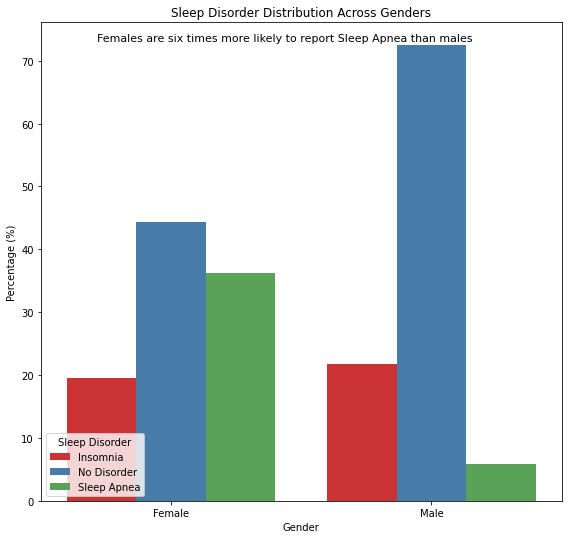

In [503]:
# Lets start with gender and sleep Disorder
gender_count = health_wellness_df.groupby(['Gender', 'Sleep Disorder']).size().reset_index(name='Count')
total_gender = health_wellness_df.groupby(['Gender']).size().reset_index(name='Total')
# Merge the dfs count and total
merged_df = gender_count.merge(total_gender, on='Gender')
merged_df['Percentage'] = (merged_df['Count'] / merged_df['Total']) * 100
# Plot
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(data=merged_df, x='Gender', y='Percentage', hue='Sleep Disorder', ax=ax, palette='Set1')
# Labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage (%)')
ax.set_title('Sleep Disorder Distribution Across Genders')
fig.text(0.5, 0.87, 
         'Females are six times more likely to report Sleep Apnea than males', 
         ha='center', fontsize=11)
ax.legend(title='Sleep Disorder', loc='lower left')
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()



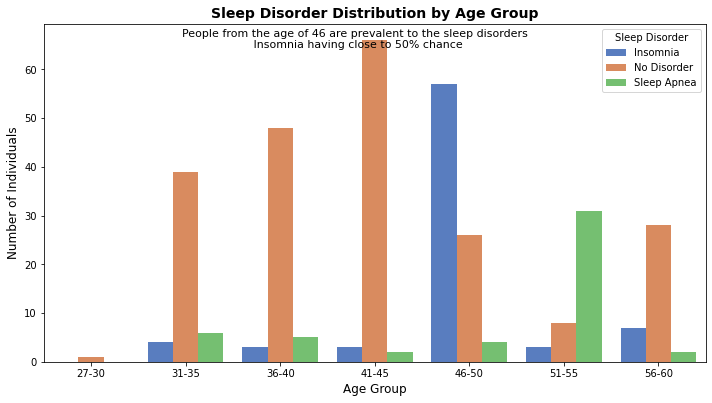

In [504]:
# Sleep disorder by Age 
health_wellness_df['Age Group'] = pd.cut(
    health_wellness_df['Age'],
    bins=[0, 27, 31, 36, 41, 46, 51, 56],
    labels=['27-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60'])

age_sleep = health_wellness_df.groupby(['Age Group', 'Sleep Disorder']).size().reset_index(name='Count')
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=age_sleep, x='Age Group', y='Count', hue='Sleep Disorder', palette='muted', ax=ax)
ax.set_title('Sleep Disorder Distribution by Age Group', fontsize=14, weight='bold')
fig.text(0.5, 0.83, 'People from the age of 46 are prevalent to the sleep disorders \n'
' Insomnia having close to 50% chance', 
         ha='center', fontsize=11)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Number of Individuals', fontsize=12)
ax.legend(title='Sleep Disorder')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

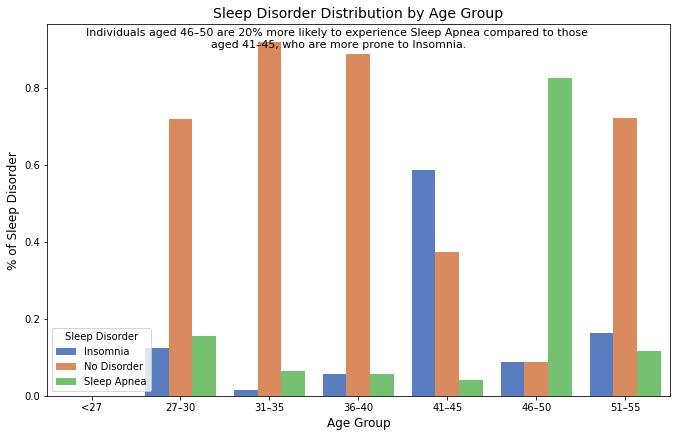

In [536]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create Age Group bins
health_wellness_df['Age Group'] = pd.cut(
    health_wellness_df['Age'],
    bins=[0, 27, 31, 36, 41, 46, 51, 56],
    labels=['<27', '27–30', '31–35', '36–40', '41–45', '46–50', '51–55'],
    right=False  # Optional: exclude upper edge
)

# Group data to get the count
age_sleep = health_wellness_df.groupby(['Age Group', 'Sleep Disorder']).size().reset_index(name='Count')
# Group data to get the total from the Age Group
age_total = health_wellness_df.groupby(['Age Group']).size().reset_index(name='Total')
# Merge the two data
merged_df_age = age_sleep.merge(age_total, on='Age Group')
merged_df_age['Percentage'] = merged_df_age['Count'] / merged_df_age['Total']

# Plot
fig, ax = plt.subplots(figsize=(9.5, 6.5))
sns.barplot(data=merged_df_age, x='Age Group', y='Percentage', hue='Sleep Disorder', palette='muted', ax=ax)

# Main title and subtitle
ax.set_title('Sleep Disorder Distribution by Age Group', fontsize=14)
fig.text(0.5, 0.84, 'Individuals aged 46–50 are 20% more likely to experience Sleep Apnea compared to those \n' \
'aged 41–45, who are more prone to Insomnia.', 
         ha='center', fontsize=11)

# Axis labels
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('% of Sleep Disorder', fontsize=12)

# Legend
ax.legend(title='Sleep Disorder')

# Final display
plt.tight_layout(rect=[0,0,1, 0.95])
plt.legend(title='Sleep Disorder', loc='lower left')
plt.show()


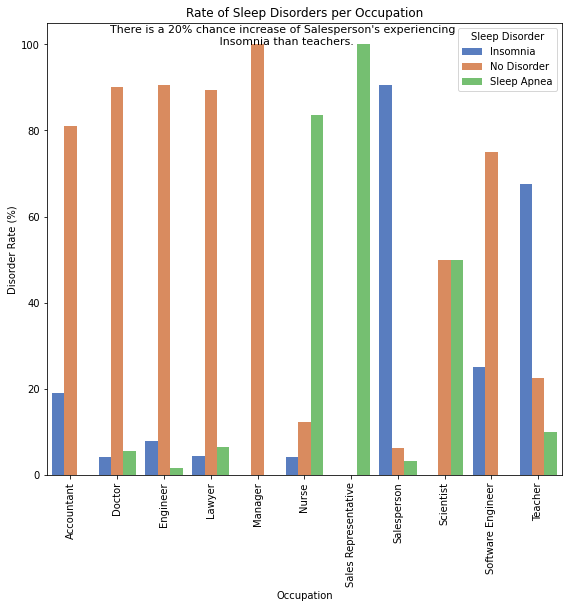

In [ ]:
# Count occurrences
count_df = health_wellness_df.groupby(['Occupation', 'Sleep Disorder']).size().reset_index(name='Count')

# Get total per occupation
total_df = health_wellness_df.groupby('Occupation').size().reset_index(name='Total')

# Merge and calculate percentage
merged_df = count_df.merge(total_df, on='Occupation')
merged_df['Percentage'] = (merged_df['Count'] / merged_df['Total']) * 100

# Plot
fig, ax = plt.subplots(figsize=(8, 9))
sns.barplot(data=merged_df, x='Occupation', y='Percentage', hue='Sleep Disorder', ax=ax, palette='muted')

# Customize plot
plt.xlabel('Occupation')
plt.ylabel('Disorder Rate (%)')
plt.xticks(rotation=90)
plt.title('Rate of Sleep Disorders per Occupation')

# Add annotation
fig.text(0.5, 0.875, 
         "Salespersons are 20% more likely to experience Insomnia compared to Teachers.", 
         ha='center', 
         fontsize=11)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()




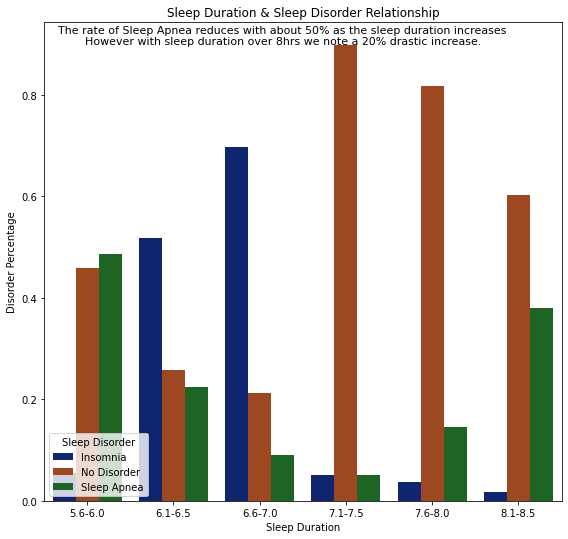

In [507]:
# Sleep Duration and Sleep Disorder
health_wellness_df['Sleep Duration'] = pd.cut(
    health_wellness_df['Sleep Duration'],
    bins = [0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5],
    labels = ['5.6-6.0', '6.1-6.5', '6.6-7.0', '7.1-7.5', '7.6-8.0', '8.1-8.5']
)
# Count
sleep_duration_count = health_wellness_df.groupby(['Sleep Duration', 'Sleep Disorder']).size().reset_index(name='Count')
# total of sleep duration
sleep_duration_total = health_wellness_df.groupby(['Sleep Duration']).size().reset_index(name='Total')
# merge the dataframes
sleep_duration_merged = sleep_duration_count.merge(sleep_duration_total, on='Sleep Duration')
sleep_duration_merged['Percentage'] = sleep_duration_merged['Count'] / sleep_duration_merged['Total']

fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(data=sleep_duration_merged, x='Sleep Duration', y='Percentage', hue='Sleep Disorder', ax=ax, palette='dark')
ax.set_xlabel('Sleep Duration')
ax.set_ylabel('Disorder Percentage')
ax.set_title('Sleep Duration & Sleep Disorder Relationship')
fig.text(0.5, 0.865, 'The rate of Sleep Apnea reduces with about 50% as the sleep duration increases \n' \
'However with sleep duration over 8hrs we note a 20% drastic increase. ', ha='center', fontsize=11)
plt.tight_layout(rect=[0,0,1,0.95])
plt.legend(title = 'Sleep Disorder', loc='lower left')
plt.show();

**Observations**

* We observe a clear inverse relationship between sleep duration and the prevalence of Sleep Apnea up to around 8 hours of sleep with cases reducing by nearly 50%. However, individuals sleeping more than 8 hours exhibit a sharp 20% increase in Sleep Apnea cases, suggesting a possible threshold beyond which excessive sleep may correlate with higher risk

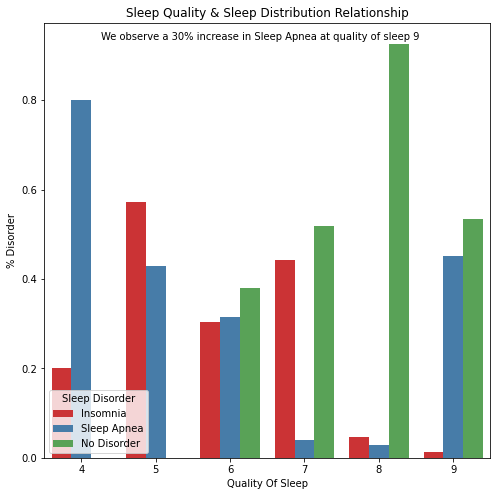

In [531]:
# Quality of sleep and sleep disorder
sleep_quality_count = health_wellness_df.groupby(['Quality of Sleep', 'Sleep Disorder']).size().reset_index(name='Count')
# Total count of sleep disorders in the different categories of quality of sleep
sleep_quality_total = health_wellness_df.groupby(['Quality of Sleep']).size().reset_index(name='Total')
# Merge the count and total to find the percentage
merged_df = sleep_quality_count.merge(sleep_quality_total, on='Quality of Sleep')
merged_df['Percentage'] = merged_df['Count'] / merged_df['Total']
merged_df['Percentage']
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(data=merged_df, x='Quality of Sleep', y='Percentage', hue='Sleep Disorder', ax=ax, palette='Set1')
ax.set_xlabel('Quality Of Sleep')
ax.set_ylabel('% Disorder')
ax.set_title('Sleep Quality & Sleep Distribution Relationship')
fig.text(0.5, 0.85, 'We observe a 30% increase in Sleep Apnea at quality of sleep 9', ha='center', fontsize=10)
ax.legend(title='Sleep Disorder', loc='lower left')
plt.show();

**Observations**

* We observe a 30% increase in the prevalence of Sleep Apnea among individuals with a self-reported sleep quality score of 9. This suggests that even those who perceive their sleep as high-quality may still experience undiagnosed or underlying apnea symptoms, highlighting the importance of clinical sleep assessments.

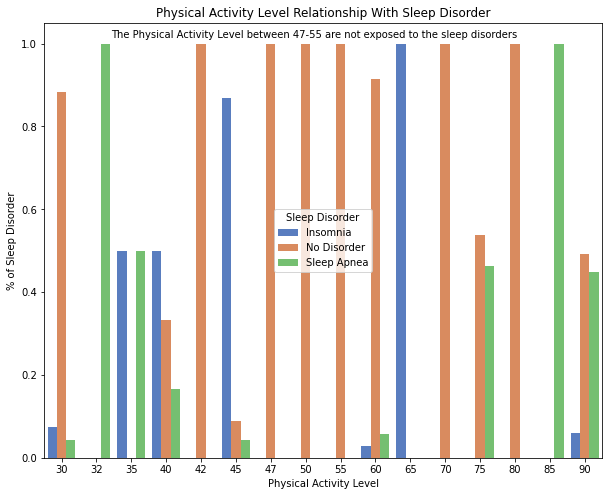

In [543]:
# Physical Activity Level and Sleep Disorder
physical_activity = health_wellness_df.groupby(['Physical Activity Level', 'Sleep Disorder']).size().reset_index(name='Count')
# Total number of those with the Physical Activity Levels
physical_total = health_wellness_df.groupby(['Physical Activity Level']).size().reset_index(name='Total')
# Merge the total and count
merged_df_activity = physical_activity.merge(physical_total, on='Physical Activity Level')
merged_df_activity['Percentage'] = merged_df_activity['Count'] / merged_df_activity['Total']

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=merged_df_activity, x='Physical Activity Level', y='Percentage', hue='Sleep Disorder', ax=ax, palette='muted')
ax.set_title('Physical Activity Level Relationship With Sleep Disorder')
fig.text(0.5, 0.855, 'The Physical Activity Level between 47-55 are not exposed to the sleep disorders', ha='center', fontsize=10)
ax.set_xlabel('Physical Activity Level')
ax.set_ylabel('% of Sleep Disorder')
ax.legend(title='Sleep Disorder', loc='center')
plt.show();

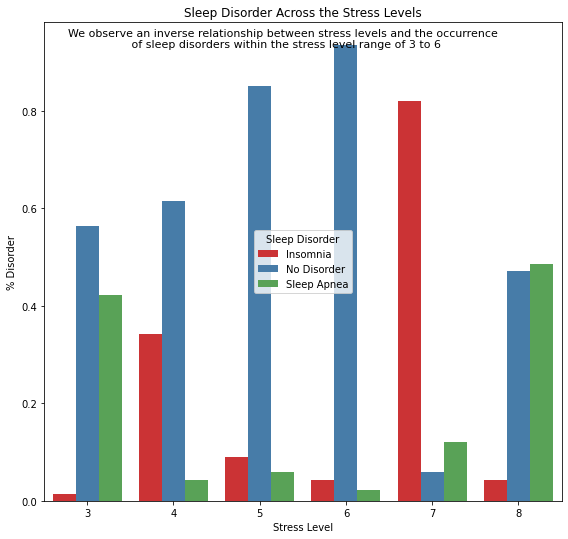

In [549]:
# Stress Level and Sleep Disorder
stress_level = health_wellness_df.groupby(['Stress Level', 'Sleep Disorder']).size().reset_index(name='Count')
# Get the total
stress_level_total = health_wellness_df.groupby(['Stress Level']).size().reset_index(name='Total')
#merge the two dfs
merged_stress_level_df = stress_level.merge(stress_level_total, on = 'Stress Level')
merged_stress_level_df['Percentage'] = merged_stress_level_df['Count'] / merged_stress_level_df['Total'] 
#visualze the % of sleep disorder across the different stress level
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(data=merged_stress_level_df, x='Stress Level', y='Percentage', hue='Sleep Disorder', ax=ax, palette='Set1')
ax.set_ylabel('% Disorder')
ax.set_xlabel('Stress Level')
ax.set_title('Sleep Disorder Across the Stress Levels')
fig.text(0.5, 0.86, 'We observe an inverse relationship between stress levels and the occurrence \n of sleep disorders within the stress level range of 3 to 6', ha='center', fontsize=11)
ax.legend(title='Sleep Disorder', loc='center')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

**Observations**

* We observe an inverse relationship between stress levels and the occurrence of sleep disorders within the stress level range of 3 to 6. As stress levels increase from low to above average (levels 3 to 6), the prevalence of sleep disorders decreases. Interestingly, we note an approximately 90% reduction in the occurrence of sleep disorders as stress levels transition from above average (level 6) to high (levels 7 and above), suggesting potential non-linear dynamics between stress and sleep disorders in the dataset.

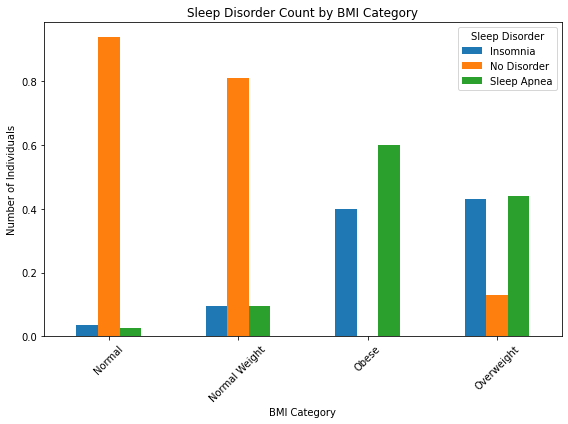

In [552]:
# BMI Category and Sleep Disorder
bmi_cat = health_wellness_df.groupby(['BMI Category', 'Sleep Disorder']).size().reset_index(name='Count')
bmi_cat_total = health_wellness_df.groupby(['BMI Category']).size().reset_index(name='Total')
merged_bmi_df = bmi_cat.merge(bmi_cat_total, on='BMI Category')
merged_bmi_df['Percentage'] = merged_bmi_df['Count'] / merged_bmi_df['Total']
# Pivot the data for grouped bar chart
pivot_df = merged_bmi_df.pivot(index='BMI Category', columns='Sleep Disorder', values='Percentage').fillna(0)

# Plotting
pivot_df.plot(kind='bar', figsize=(8, 6))

plt.title('Sleep Disorder Count by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.legend(title='Sleep Disorder')
plt.tight_layout()
plt.show()

**Observations**

* Most of the sleep disorder that is Insomnia and Sleep Apnea affects the overweight BMI category.

   Blood Pressure Sleep Disorder  Count
0          115/75       Insomnia      1
1          115/75    No Disorder     30
2          115/75    Sleep Apnea      1
3          115/78    No Disorder      2
4          117/76    No Disorder      2
5          118/75    No Disorder      2
6          118/76    No Disorder      1
7          119/77    No Disorder      2
8          120/80    No Disorder     43
9          120/80    Sleep Apnea      2
10         121/79    No Disorder      1
11         122/80    No Disorder      1
12         125/80       Insomnia      2
13         125/80    No Disorder     63
14         125/82    No Disorder      4
15         126/83    No Disorder      2
16         128/84    No Disorder      2
17         128/85    No Disorder      3
18         129/84       Insomnia      1
19         129/84    Sleep Apnea      1
20         130/85       Insomnia     40
21         130/85    No Disorder     54
22         130/85    Sleep Apnea      5
23         130/86       Insomnia      1


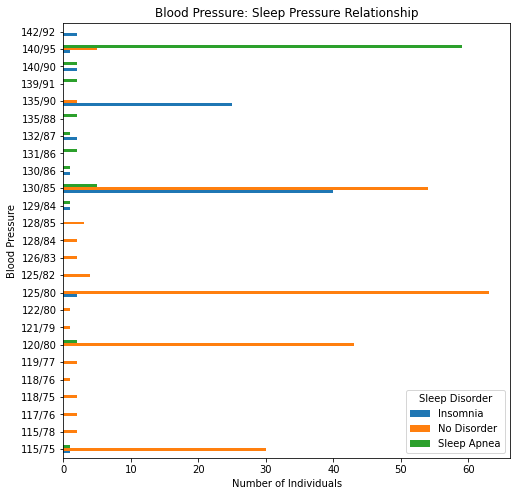

In [512]:
# Blood Pressure and Sleep Disorder
blood_pres = health_wellness_df.groupby(['Blood Pressure', 'Sleep Disorder']).size().reset_index(name='Count')
print(blood_pres)

blood_pres_pivot_df = blood_pres.pivot(index='Blood Pressure', columns='Sleep Disorder', values='Count').fillna(0)
blood_pres_pivot_df.plot(kind='barh', figsize=(8,8))
plt.xlabel('Number of Individuals')
plt.ylabel('Blood Pressure')
plt.title('Blood Pressure: Sleep Pressure Relationship')
plt.show();

**Observations**

* Blood Pressure above 130/85 tend to suffer more from the Sleep Disorders. Individuals with Blood Pressure 140/95 tend to suffer from Sleep Apnea whilst 130/85 suffer from Insomnia. 

   Heart Rate Sleep Disorder  Count
0       65-68       Insomnia     26
1       65-68    No Disorder     41
2       65-68    Sleep Apnea      0
3       69-71       Insomnia      2
4       69-71    No Disorder     66
5       69-71    Sleep Apnea     30
6       72-75       Insomnia     39
7       72-75    No Disorder    100
8       72-75    Sleep Apnea      6
9       76-79       Insomnia      2
10      76-79    No Disorder     10
11      76-79    Sleep Apnea     30
12      80-83       Insomnia      4
13      80-83    No Disorder      2
14      80-83    Sleep Apnea      4
15      84-87       Insomnia      3
16      84-87    No Disorder      0
17      84-87    Sleep Apnea      4
18      88-90       Insomnia      1
19      88-90    No Disorder      0
20      88-90    Sleep Apnea      4


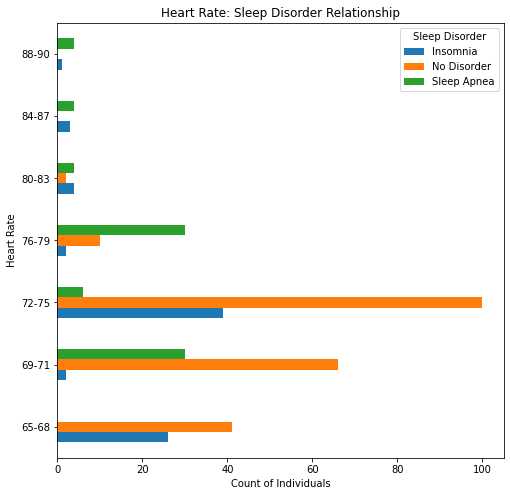

In [513]:
# Heart Rate and Sleep Disorder
health_wellness_df['Heart Rate'] = pd.cut(
    health_wellness_df['Heart Rate'],
    bins = [0, 65, 69, 72, 76, 80, 84, 88],
    labels = ['65-68', '69-71', '72-75', '76-79', '80-83', '84-87', '88-90']
)
heart_rate = health_wellness_df.groupby(['Heart Rate', 'Sleep Disorder']).size().reset_index(name='Count')
print(heart_rate)

heart_rate_pivot = heart_rate.pivot(index='Heart Rate', columns='Sleep Disorder', values='Count').fillna(0)
heart_rate_pivot.plot(kind='barh', figsize=(8,8))
plt.title('Heart Rate: Sleep Disorder Relationship')
plt.xlabel('Count of Individuals')
plt.ylabel('Heart Rate')
plt.show();

**Observations**

* The Heart rates of 65-75 have majority of the people who do not suffer from the sleep disorders. Heart rate between 72-75 has the majority of Insomnia and 76-79 and 69-71 have the highest number of Sleep Apnea.

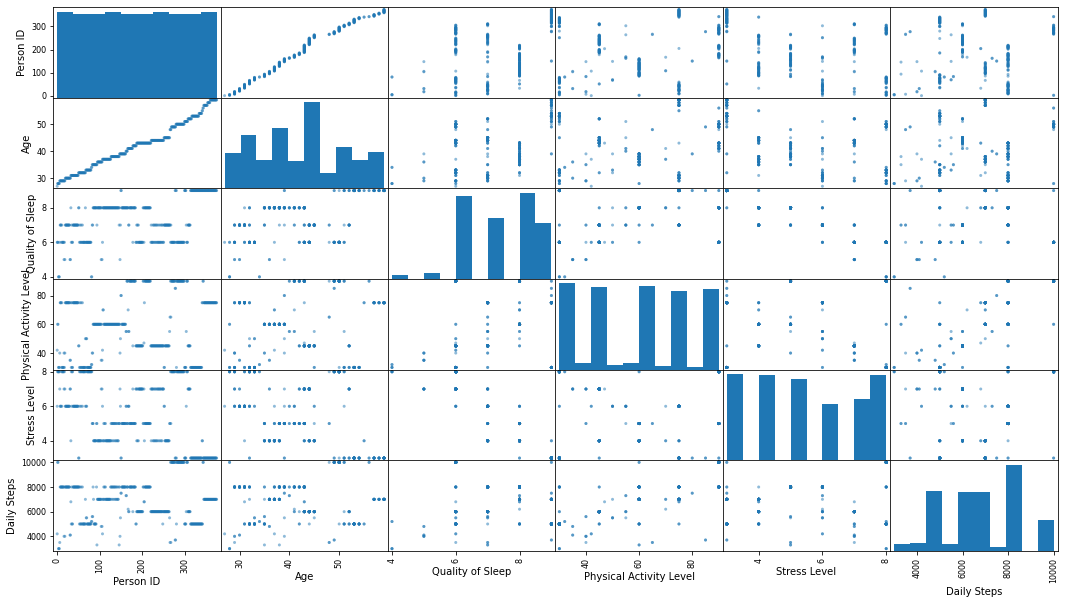

In [514]:
#Select the numerical columns
numericals = health_wellness_df.select_dtypes(include='number')
#To view the distribution of the numerical columns
pd.plotting.scatter_matrix(numericals, figsize=(18,10));

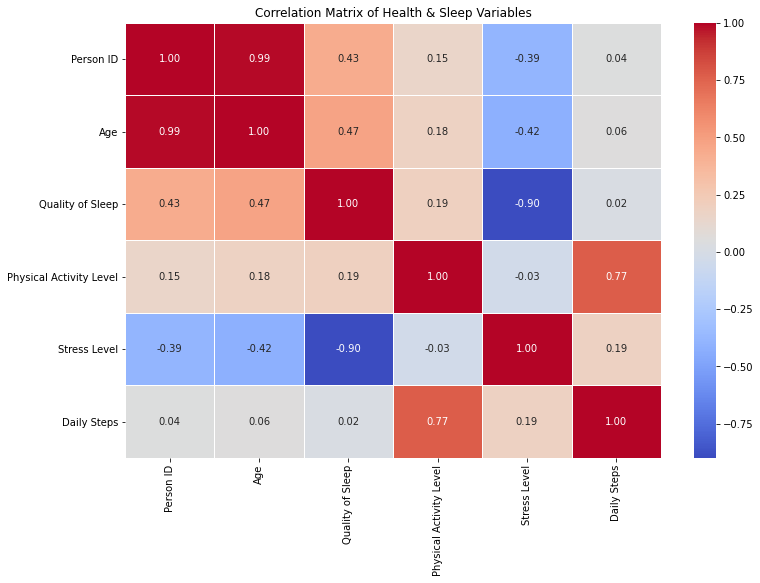

In [515]:
# Compute the correlation matrix
corr_matrix = numericals.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Health & Sleep Variables")
plt.show()

**Observations**

* We do not see any obvious linear relationship from the pair plots. This suggests that transformation is required before modeling our data.

* Many scatter plots look clumped into vertical lines, which suggests some variables are discrete or have a small number of distinct values.

* From the correlation matrix we see that the stress level is strongly negatively correlation with the quality of sleep.

* There is also a strong positive correlation between daily steps and Physical activity level.